##### Problem Set 1, due April 5th at 5:30pm 


###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [3]:
# #IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.
Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [3]:
flights_df= pd.read_csv('flights/flights.csv')

In [4]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)

['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
z = flights_df[(flights_df['dest'] == 'SEA') & (flights_df['year']==2013)]

len(z)

3923

There were **3,923** flights from NYC (JFK or LGA) to Seattle (SEA) in 2013 

(b) How many airlines fly from NYC to Seattle?

In [7]:
z = flights_df[(flights_df['dest'] == 'SEA')]

len(z['carrier'].unique())


5

**5** unique carriers fly from NYC to Seattle

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
len(z['tailnum'].unique())

936

**936** unique airplanes fly from NYC to Seattle 

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
z['arr_delay'].mean()


-1.0990990990990992

The average arrival delay is actually **-1.10** minutes (meaning the planes arrive early, on average)

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [10]:
#====== Method 1:

# calculate total number of flights to Seattle
z = flights_df[(flights_df['dest'] == 'SEA')]
# calculate number of flights to Seattle from LGA
lga = flights_df[(flights_df['origin']=='LGA') & (flights_df['dest'] == 'SEA')]
# calculate number of flights to Seattle from JFK
jfk = flights_df[(flights_df['origin']=='JFK') & (flights_df['dest'] == 'SEA')]
# calculate number of flights to Seattle from JFK
ewr = flights_df[(flights_df['origin']=='EWR') & (flights_df['dest'] == 'SEA')]
# divide 
print(len(lga)/len(z),",", len(jfk)/len(z), ",",  len(ewr)/len(z))

#====== Method 2:

# create a groupby object with values equal to the proportions of flights to SEA from each airport
flights_df[(flights_df['dest'] == 'SEA')].groupby(['origin','dest']).size() / len(flights_df[(flights_df['dest'] == 'SEA')])







0.0 , 0.5332653581442773 , 0.46673464185572267


origin  dest
EWR     SEA     0.466735
JFK     SEA     0.533265
dtype: float64

**0%** of the flights to Seattle come from LGA, but nearly **53.3%** of the flights come from JFK, and **46.8%** come from EWR.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
# create unique date column
flights_df = flights_df.assign(Date=flights_df.year.map(str) + 
                               "-" + flights_df.month.map(str) + 
                               "-" + flights_df.day.map(str))

# groupby date and calculate average departure and arrival delays
z = flights_df[['dep_delay','arr_delay']].groupby(flights_df['Date']).mean()

# find date with max average delays
print(z.dep_delay.idxmax(), ",", z.dep_delay.max(), ",",
      z.arr_delay.idxmax(),  ",", z.arr_delay.max())

2013-3-8 , 83.5369211514393 , 2013-3-8 , 85.86215538847118


**March 8th, 2013** had the highest average departure delay at **83.54** minutes, and also the highest average arrival delay at **85.86** minutes. 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
z = flights_df[(flights_df['year']==2013)].groupby(flights_df['Date']).mean()

z.dep_delay.idxmax()

'2013-3-8'

**March 8th, 2013** was also the worst day to fly out of NYC.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

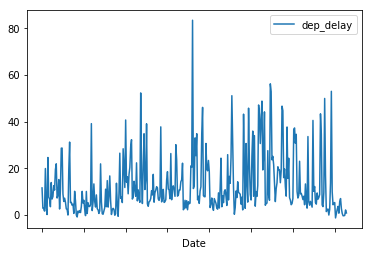

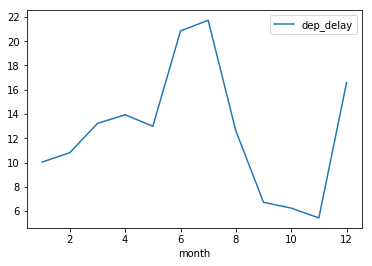

In [13]:
# Using groupby

# First let's try plotting daily averages
z = flights_df[['dep_delay']].groupby(flights_df['Date']).mean()
z.plot()

# Using every date looks a little messy, let's see if we can glean any patterns from looking at monthly averages
y= flights_df[['dep_delay']].groupby(flights_df['month']).mean()
y.plot()

Departure delays seem to be greatest during the summer months, with a lull in autumn before increasing again near the winter holidays.

(d) On average, how do departure delays vary over the course of a day?

dep_time
(0, 100]        129.506726
(100, 200]      207.254630
(200, 300]      242.900000
(300, 400]      304.727273
(400, 500]       -5.500000
(500, 600]       -4.131348
(600, 700]       -1.485186
(700, 800]        0.213966
(800, 900]        1.141606
(900, 1000]       4.343959
(1000, 1100]      5.601674
(1100, 1200]      5.593631
(1200, 1300]      7.615543
(1300, 1400]      9.587125
(1400, 1500]      7.951294
(1500, 1600]     10.793590
(1600, 1700]     13.597194
(1700, 1800]     16.930243
(1800, 1900]     18.591549
(1900, 2000]     21.741681
(2000, 2100]     28.256353
(2100, 2200]     42.633268
(2200, 2300]     68.778942
Name: dep_delay, dtype: float64


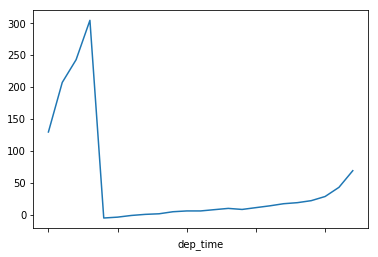

In [14]:
# First, we groupby hourly intervals of departure times
z = flights_df['dep_delay'].groupby(pd.cut(flights_df['dep_time'], np.arange(0,2400,100))).mean()

# Then we plot
print(z)
z.plot()

Looks like departure delays are highest in the early morning hours (12 AM to 4 AM) but generally low during the rest of the day.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [16]:
# Create speed variable
flights_df = flights_df.assign(speed = flights_df['air_time'] / flights_df['distance'])

# Find the flight number of the fastest flight
flights_df.sort_values(by='speed', ascending=False)['flight']

24098     1860
248839    1491
305879    3608
25455     3667
212015    1289
80009     1909
91118     1775
230885    2175
276375    1279
175065    3638
219264    1289
61395     1909
106501    2037
237716    2136
23779     3638
75445     1909
104049    2037
79592     1775
244468    1703
298041    1909
121470    1860
267435    1629
230906    2177
185187    3608
195621    3608
134244    3609
55549     1775
45168     1714
56461     1775
286310    1714
          ... 
332193    3411
332194    3748
332671      15
333188    5109
333189    2183
333190    4720
333666     331
334177    5306
334183     301
334184    2164
334185    3760
334186     269
334197    5068
334354    4510
334412    4412
334495     300
334866    5563
334867       1
334868     581
335534     327
335780    4536
335781    3134
335782     331
335805     464
336770    5274
336771    3393
336772    3525
336773    3461
336774    3572
336775    3531
Name: flight, Length: 336776, dtype: int64

The fastest flight was number **1860**

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [17]:
# count unique carrier+flight+dest combinations - which ones = 365?

z = flights_df.groupby(['carrier','flight','dest']).size()
z[z==365]


carrier  flight  dest
AA       59      SFO     365
         119     LAX     365
         181     LAX     365
         1357    SJU     365
         1611    MIA     365
B6       219     CLT     365
         359     BUR     365
         371     FLL     365
         431     SRQ     365
         703     SJU     365
         1783    MCO     365
DL       2159    MCO     365
         2391    TPA     365
EV       5712    IAD     365
UA       15      HNL     365
VX       251     LAS     365
         407     LAX     365
         413     LAX     365
dtype: int64

The answer is quite long, but there are six different carriers that have a total of 18 flights to 13 different cities, every day of the year.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


One interesting question would be to ask what airport might be the best to fly into or out of? To do these we can look at average departure and arrival times for each airport in 2013. Then count what percent of total flights was delayed.

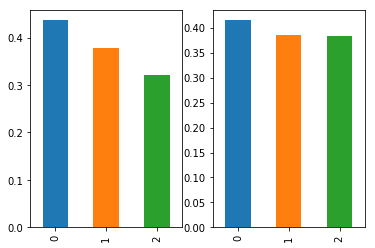

In [140]:
# What percent of flights was delayed in 2013?

# create departure delays summary df
depdelays = flights_df[(flights_df['dep_delay'] > 0)].groupby(['origin'])['dep_delay'].count().reset_index() # number of delays
depdelays

# create arrival delays summary df
arrdelays = flights_df[(flights_df['arr_delay'] > 0)].groupby(['origin'])['arr_delay'].count().reset_index() # number of delays
arrdelays

# create total flights summary df
flights = flights_df.groupby(['origin'])[('flight')].count().reset_index() # total flights
dflist = [depdelays, arrdelays, flights]

# merge all the dataframes
delays = reduce(lambda x, y: pd.merge(x, y, on = 'origin'), dflist)

# create new variables, percent arrivals delayed and percent departures delayed
delays = delays.assign(dep_delayed = delays.dep_delay / delays.flight,
                      arr_delayed = delays.arr_delay / delays.flight) 

# plot!
plt.subplot(1,2,1)
delays['dep_delayed'].plot.bar(x="origin")
plt.subplot(1,2,2)
delays['arr_delayed'].plot.bar(x="origin")

I couldn't quite figure out how to add X axis labels, but EWR has the highest percent of arrival and departure delays in 2013 (blue), followed by JFK and then LGA. So LGA would be the best airport to fly in and out of.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [19]:
# load weather data
weather = pd.read_csv('weather.csv')

print(weather.columns)
print(weather.dtypes)
print(weather.shape)
weather.head(10)

Index(['Unnamed: 0', 'origin', 'year', 'month', 'day', 'hour', 'temp', 'dewp',
       'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib'],
      dtype='object')
Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object
(8719, 15)


,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,6,EWR,2013,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,7,EWR,2013,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,8,EWR,2013,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
8,9,EWR,2013,1.0,1.0,9.0,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
9,10,EWR,2013,1.0,1.0,10.0,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


(8718, 16)


Text(0.5,0,'Visibility')

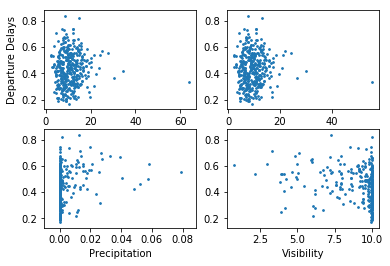

In [78]:
# okay, we're going to look at percent of flights delayed instead of average delay time

# first clean the weather data
# remove month or day that is NaN
weather.replace(["NaN", 'NaT'], np.nan, inplace = True) # so pandas recognizes the "NA" as NaN
weather = weather.dropna(subset=['month','day']) # drop it
print(weather.shape) # check that the one offending row is gone

# we need year, month, and day to all be integer so that the Date column matches that in flights_df
weather[['month','day']] = weather[['month','day']].astype('int64')

# create date variable
weather = weather.assign(Date=weather.year.map(str) +
                        "-" + weather.month.map(str) +
                        "-" + weather.day.map(str))

# Now average each weather varible by date
weathavg = weather.groupby(['Date', 'origin']).mean().reset_index()

# get percent of flights delayed from NYC for each day
delays = flights_df[flights_df['dep_delay'] > 0].groupby(['Date','origin'])['dep_delay'].count().reset_index() # number of delays
flights = flights_df.groupby(['Date', 'origin'])[('flight')].count().reset_index() # total flights

delays = pd.merge(delays, flights, on=['Date','origin']) # merge flights and delays
delays = delays.assign(per_delayed = delays.dep_delay / delays.flight) # divide to get percent of total flights delayed

# join the delays to weather data by date
weatherdelays = pd.merge(weathavg, delays, on=['Date','origin'])

# let's do some simple scatterplots with percent of flights delayed
plt.subplot(2,2,1)
plt.scatter(weatherdelays['wind_gust'], weatherdelays['per_delayed'], s=3)
plt.xlabel('Wind Gusts')
plt.ylabel('Departure Delays')
plt.subplot(2,2,2)
plt.scatter(weatherdelays['wind_speed'], weatherdelays['per_delayed'], s=3)
plt.xlabel('Wind Speed')
plt.subplot(2,2,3)
plt.scatter(weatherdelays['precip'], weatherdelays['per_delayed'], s=3)
plt.xlabel('Precipitation')
plt.subplot(2,2,4)
plt.scatter(weatherdelays['visib'], weatherdelays['per_delayed'], s=3)
plt.xlabel('Visibility')


Text(0.5,0,'Visibility')

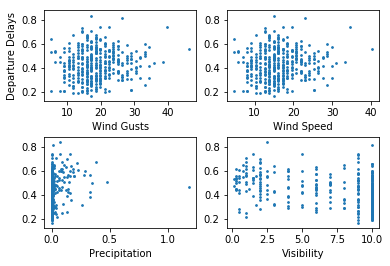

In [87]:
# Maybe max value (min for visibility) is more important than average value

# get appropriate max and min values
weathmax = weather.groupby(['Date', 'origin']).agg({'visib':'min', 'wind_gust':'max', 
                                                    'wind_speed':'max', 'precip':'max'}).reset_index()

# merge new weather variables to delays
weatherdelays2 = pd.merge(weathmax, delays, on=['Date','origin'])

# need to remove some outliers
weatherdelays2 = weatherdelays2[((weatherdelays2['wind_gust']<500) & (weatherdelays2['wind_speed']<500))]

# plot!
plt.subplot(2,2,1)
plt.subplots_adjust(hspace=0.4)
plt.scatter(weatherdelays2['wind_gust'], weatherdelays2['per_delayed'], s=3)
plt.xlabel('Wind Gusts')
plt.ylabel('Departure Delays')
plt.subplot(2,2,2)
plt.scatter(weatherdelays2['wind_speed'], weatherdelays2['per_delayed'], s=3)
plt.xlabel('Wind Speed')
plt.subplot(2,2,3)
plt.scatter(weatherdelays2['precip'], weatherdelays2['per_delayed'], s=3)
plt.xlabel('Precipitation')
plt.subplot(2,2,4)
plt.scatter(weatherdelays2['visib'], weatherdelays2['per_delayed'], s=3)
plt.xlabel('Visibility')


Not a strong pattern but it seems like more flights tend to be delayed during periods of low visibility, and flight delays tend to increase with precipitation. 